#### Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv

##### mpl

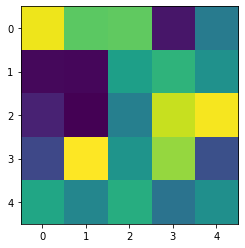

In [2]:
# %matplotlib notebook
%matplotlib inline
plt.imshow(np.random.rand(5,5))

# Bathymetry

In [3]:
fname = '../../data/bt_x8000_18000_y4000_14000_shape201x201.mmp'
nx, ny = (201,201)
bt = np.memmap(fname, dtype=np.float32, shape=(nx,ny))

dx, dy, dz = (50, 50, 50)
x1, x2, y1, y2 = 8e3, 18e3, 4e3, 14e3
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dx, dy)
xx, yy = np.meshgrid(x, y)
sg = pv.StructuredGrid(xx, yy, -bt)

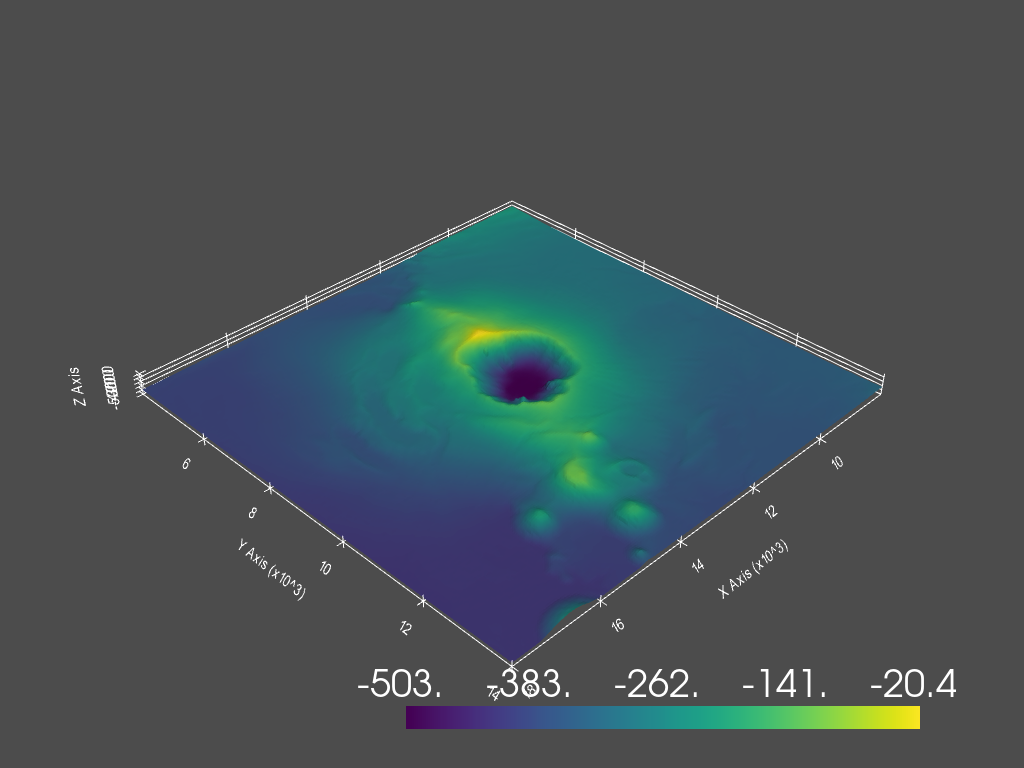

In [9]:
# plot 
p = pv.Plotter(off_screen=True)
# p.add_axes_at_origin()
# scalars = sg.points[:,2]
p.add_mesh(sg, scalars=sg.points[:,2])
p.show_grid()
p.show()

# Vp model

In [13]:
fname = '../../data/p14-CP00160-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp'
nx, ny, nz = (201,201,81)
vp = np.memmap(fname, dtype=np.float32, shape=(nx,ny,nz))
# vp1d = np.mean(vp, axis=(0,1))
# vp = vp - vp1d
dx, dy, dz = (50, 50, 50)
x1, x2, y1, y2, z1, z2 = 8e3, 18e3, 4e3, 14e3, 0, 4e3

In [ ]:
# p = pv.Plotter(off_screen=True)
# # p.add_axes_at_origin()
# scalars = a.points[:,:,:]
# p.add_mesh(a, scalars=scalars)

In [ ]:
# a.plot(
#     # opacity='sigmoid_r',
#     # opacity=.5,
# )

In [ ]:
# help(a.threshold)
# %%time
# bodies = a.threshold(0).split_bodies()

In [ ]:
bodies.plot(opacity=.4)

# Vp anomaly 

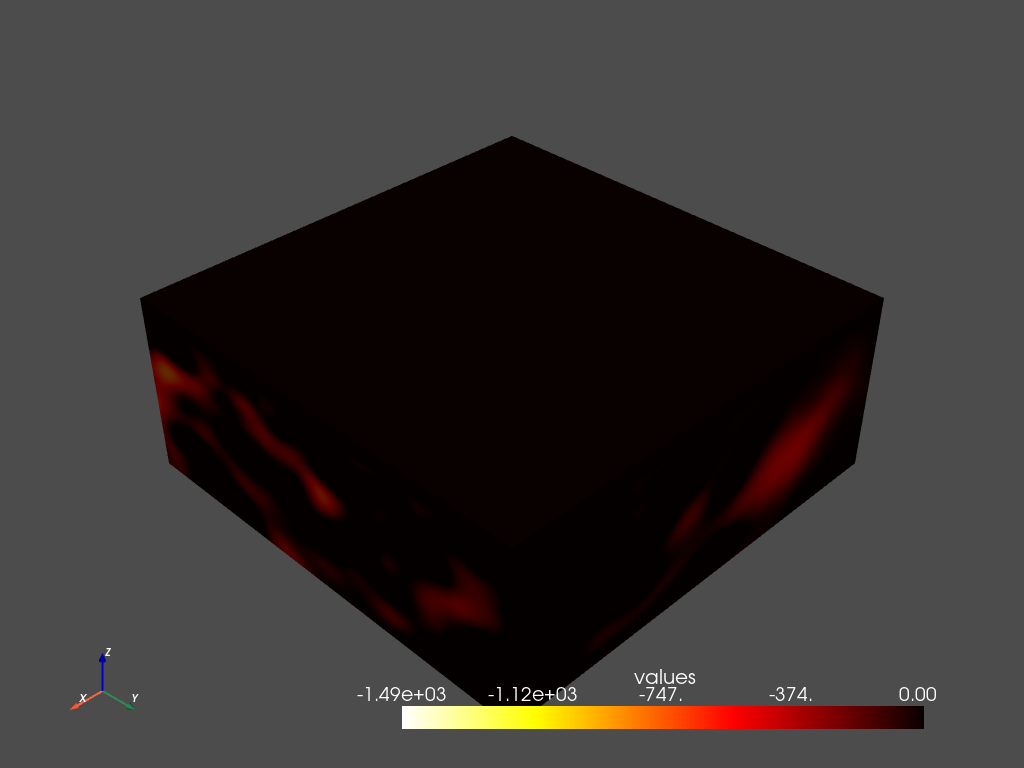

In [19]:
import numpy as np
import pyvista as pv
fname = '../../data/p14-CP00080-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp'
nx, ny, nz = (201,201,81)
vp = np.memmap(fname, dtype=np.float32, shape=(nx,ny,nz))
# vp = vp[..., 55:]
clip = 0 # m/s
vp[vp > clip] = 0
dims = (nx,ny,nz)
spacing = (50,50,50)
origin = (8e3,4e3,0)
a = pv.UniformGrid()
# a = pv.UniformGrid(dims, spacing, origin)
a.dimensions = vp.shape
vp[...,:] = vp[...,::-1] # flip z axis
a.point_data["values"] = vp.flatten(order="F")
a.plot(cmap='hot_r')
 
# p.show()

In [20]:
%%time 
# clipped = a.clip('z', origin=(0,0,3e3))
bounds = [1e4,1.2e4 ,8e3,1e4, 1e3,2e3]
clipped = a.clip_box(bounds)

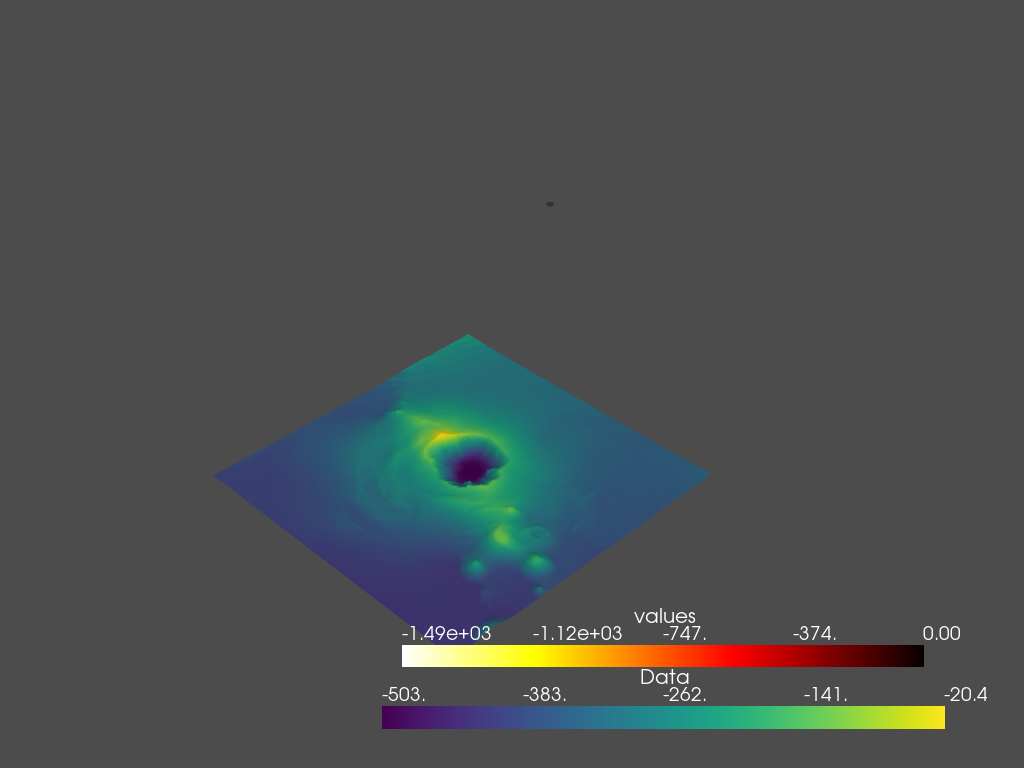

In [32]:
iso1 = a.contour([-1.2e3])
p = pv.Plotter()
# p.add_mesh(a)
# p.add_mesh(a, style='wireframe') #cmap='fire_r') #, opacity='linear_r')
p.add_mesh(grid)
p.add_mesh(clipped, opacity=.2, cmap='hot_r')
p.add_mesh(iso1, color='white')
# p.add_axes()
p.show()

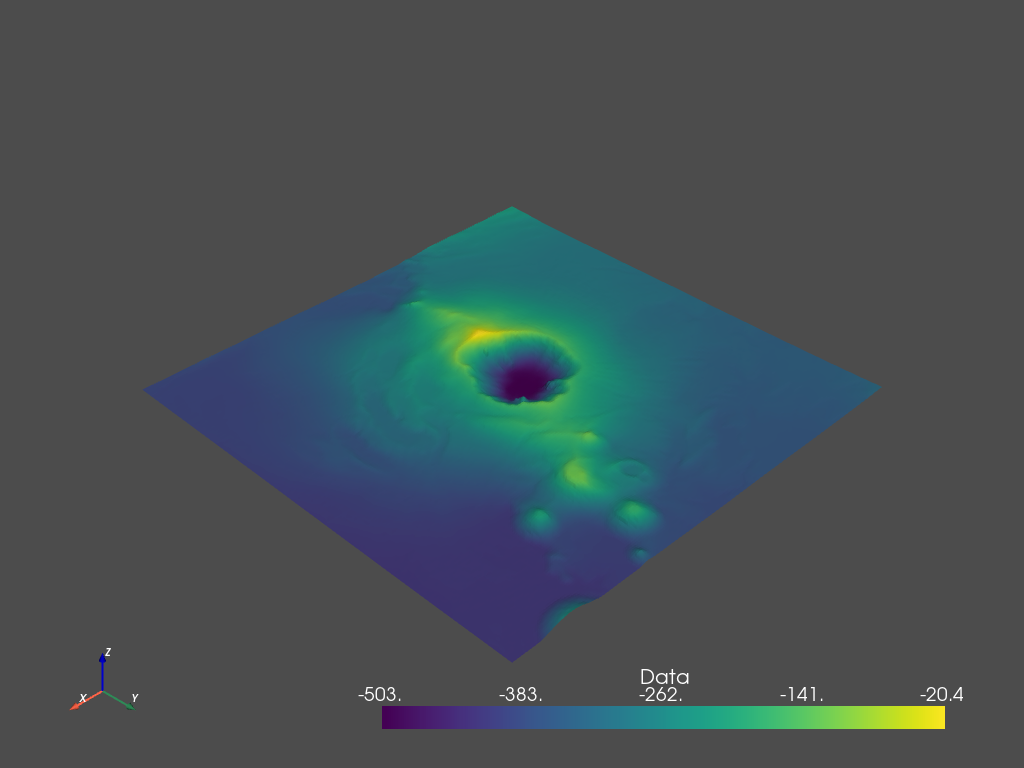

In [31]:
grid.plot()

# ...